## How to read a book in Python

Text is among the most important types of data. The discipline that reasons about text written by humans is called _natural language processing_ (NLP). NLP draws on computer science, linguistics, ...

Let's get a quick whiff on how we can import and manipulate text using basic Python. 


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [13]:
book_file = open("../data/around-the-world.txt", "r")
book = book_file.read()
book_file.close()

avg_chars_per_page = 1250
print("This book has an estimated", len(book) / avg_chars_per_page, "pages")

This book has an estimated 310.752 pages


In [14]:
chapters_ = re.split("CHAPTER |\*\*\* END OF THE ", book)
chapters_[2]
chapters = chapters_[38:]

In [15]:
test_text = "bla 1: this is something... bla 2: then something else... bla 3: even more somethings"
re.split("bla ", test_text)

['',
 '1: this is something... ',
 '2: then something else... ',
 '3: even more somethings']

In [16]:
n_chars = []
n_periods = []
for chapter in chapters:
    n_chars.append(len(chapter))
    n_periods.append(chapter.count(".") - chapter.count("Mr."))

122.36638969141632

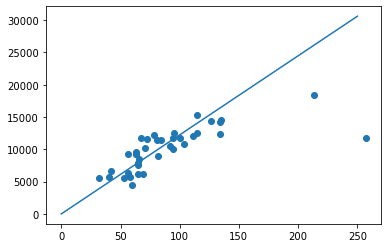

In [17]:
plt.scatter(n_periods, n_chars)

# a silly regression
alpha = [ n_chars[idx] / n_periods[idx] for idx in range(len(n_chars)) ]
alpha = sum(alpha) / len(n_chars)
plt.plot([0, 250], [0, 250*alpha])
alpha

# note to myself: hey this is robust

In [18]:
# first do this only for Fog, and plot the thing, 
# then conclude that it wouldn't make sense to do it 
# for every name

fogg, ppt, fix = [0], [0], [0]
for chapter in chapters:
    fogg.append(fogg[len(fogg) - 1] + chapter.count("Fogg"))
    ppt.append(ppt[len(ppt) - 1] + chapter.count("Passepartout"))
    fix.append(fix[len(fix) - 1] + chapter.count("Fix"))

In [19]:
characters = ["Fogg", "Passepartout", "Fix", "Aouda", "Mudge"]
appearances = {key: list([0]) for key in characters}

for chapter in chapters:
    for character in characters:
        runsum = appearances[character][len(appearances[character]) - 1]
        appearances[character].append(0*runsum + chapter.count(character))


# this is a great opportunity to learn about references and immutability, with dict.fromkeys(blah, [])

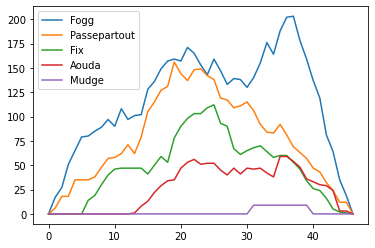

In [20]:
for character in characters:
    plt.plot(np.convolve(appearances[character], [1, 1, 1, 1, 1, 1, 1, 1, 1]))

plt.legend(characters)

In [22]:
book_file = open("../data/around-the-world.txt", "r")


In [23]:
a = book_file.read()

In [24]:
whos

Variable             Type             Data/Info
-----------------------------------------------
a                    str              The Project Gutenberg eBo<...>r about new eBooks.\n\n\n
alpha                float            122.36638969141632
appearances          dict             n=5
avg_chars_per_page   int              1250
book                 str              The Project Gutenberg eBo<...>r about new eBooks.\n\n\n
book_file            TextIOWrapper    <_io.TextIOWrapper name='<...>ode='r' encoding='UTF-8'>
chapter              str              PROJECT GUTENBERG EBOOK A<...>r about new eBooks.\n\n\n
chapters             list             n=38
chapters_            list             n=76
character            str              Mudge
characters           list             n=5
fix                  list             n=39
fogg                 list             n=39
n_chars              list             n=38
n_periods            list             n=38
np                   module           <mod